In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('dizel.csv',
                     infer_datetime_format=True, index_col='Week of', header=0)

In [ ]:
df

,Weekly U.S. No 2 Diesel Retail Prices Dollars per Gallon
Week of,
1994-03-21,1.106
1994-03-28,1.107
1994-04-04,1.109
1994-04-11,1.108
1994-04-18,1.105
...,...
2021-05-31,3.255
2021-06-07,3.274
2021-06-14,3.286


In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

In [ ]:
from threading import Barrier


import pandas as pd
import tensorflow as tf


def normalize_series(data, min, max):
    data = data - min
    data = data / max
    return data

def windowed_dataset(series, batch_size, n_past=10, n_future=10, shift=1):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(size=n_past + n_future, shift=shift, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(n_past + n_future))
    ds = ds.map(lambda w: (w[:n_past], w[n_past:]))
    return ds.batch(batch_size).prefetch(1)

def solution_model():
    # DO NOT CHANGE THIS CODE
    # Reads the dataset.
    df = pd.read_csv('dizel.csv',
                     infer_datetime_format=True, index_col='Week of', header=0)

    # Number of features in the dataset. We use all features as predictors to
    # predict all features of future time steps.
    N_FEATURES = len(df.columns) # DO NOT CHANGE THIS

    # Normalizes the data
    data = df.values
    data = normalize_series(data, data.min(axis=0), data.max(axis=0))

    # Splits the data into training and validation sets.
    SPLIT_TIME = int(len(data) * 0.8) # DO NOT CHANGE THIS
    x_train = data[:SPLIT_TIME]
    x_valid = data[SPLIT_TIME:]

    # DO NOT CHANGE THIS CODE



    BATCH_SIZE = 32  # ADVISED NOT TO CHANGE THIS

    N_PAST = 10  # DO NOT CHANGE THIS

    # Number of future time steps which are to be predicted.
    N_FUTURE = 10  # DO NOT CHANGE THIS

    SHIFT = 1  # DO NOT CHANGE THIS

    # Code to create windowed train and validation datasets.
    train_set = windowed_dataset(series=x_train, batch_size=BATCH_SIZE,
                                 n_past=N_PAST, n_future=N_FUTURE,
                                 shift=SHIFT)
    valid_set = windowed_dataset(series=x_valid, batch_size=BATCH_SIZE,
                                 n_past=N_PAST, n_future=N_FUTURE,
                                 shift=SHIFT)

    # Code to define your model.

    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(16, return_sequences=True,activation='elu', input_shape=(N_PAST, N_FEATURES)),
        tf.keras.layers.LSTM(32, activation='elu', return_sequences=True),
        tf.keras.layers.SimpleRNN(32, activation='elu',return_sequences=True ),
        tf.keras.layers.GRU(64, activation='relu'),
        tf.keras.layers.Dense(N_FEATURES)
    ])
    

   

    optimizer = 'rmsprop'
    model.compile(
        loss="huber",
        optimizer=optimizer,
        metrics=["mae"]
    
    )

    history=model.fit(
        train_set, validation_data=valid_set,validation_steps=1, epochs=50,
          batch_size = BATCH_SIZE)

    return model, history

model, history = solution_model()

Epoch 1/50
35/35 [==============================] - 9s 57ms/step - loss: 0.0057 - mae: 0.0628 - val_loss: 0.0011 - val_mae: 0.0447
Epoch 2/50
35/35 [==============================] - 1s 21ms/step - loss: 0.0058 - mae: 0.0721 - val_loss: 3.5918e-04 - val_mae: 0.0230
Epoch 3/50
35/35 [==============================] - 1s 21ms/step - loss: 0.0050 - mae: 0.0592 - val_loss: 3.1079e-04 - val_mae: 0.0211
Epoch 4/50
35/35 [==============================] - 1s 22ms/step - loss: 0.0045 - mae: 0.0547 - val_loss: 2.2247e-04 - val_mae: 0.0177
Epoch 5/50
35/35 [==============================] - 1s 21ms/step - loss: 0.0042 - mae: 0.0512 - val_loss: 2.0880e-04 - val_mae: 0.0172
Epoch 6/50
35/35 [==============================] - 1s 21ms/step - loss: 0.0040 - mae: 0.0495 - val_loss: 2.0933e-04 - val_mae: 0.0172
Epoch 7/50
35/35 [==============================] - 1s 25ms/step - loss: 0.0038 - mae: 0.0483 - val_loss: 1.8812e-04 - val_mae: 0.0162
Epoch 8/50
35/35 [==============================] - 1s 22ms

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  mae = history.history['mae']
  val_mae = history.history['val_mae']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot mae
  plt.figure()
  plt.plot(epochs, mae, label='training_mae')
  plt.plot(epochs, val_mae, label='val_mae')
  plt.title('Mae')
  plt.xlabel('Epochs')
  plt.legend();

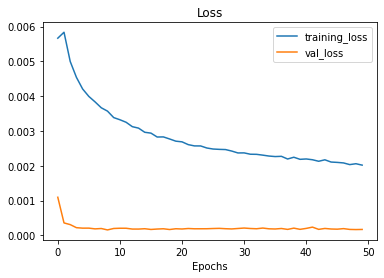

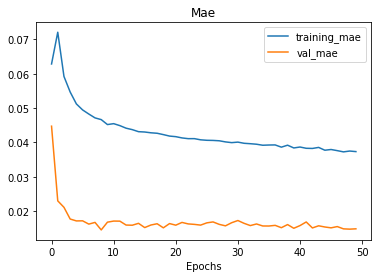

In [ ]:
plot_loss_curves(history)

In [ ]:
model.save('Diezel.h5')